## Useless Library

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

# some libs from kaggle
import xgboost as xgb
from tqdm import tqdm
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import BatchNormalization
from keras import utils

from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB

from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping

# NLP
import gensim
import string, re, nltk
from string import punctuation
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
# !pip install num2words
# from num2words import num2words
# !pip install pyspellchecker
# from spellchecker import SpellChecker
from nltk.stem.porter import PorterStemmer
import spacy
from nltk.stem import WordNetLemmatizer

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# from nltk import word_tokenize
# from nltk.corpus import stopwords
# stop_words = stopwords.words('english')

# !pip install sastrawi
# from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
# stop_factory = StopWordRemoverFactory()

stop_id = pd.read_csv("https://raw.githubusercontent.com/irfandythalib/python-indonesia-stopwords-remover/main/tala-stopwords-indonesia.txt", header=None)[0].to_list()

## We do what?
1. using tf idf in conventional binary classification
2. using pre-trained word2vec in conventional classif -- for real idk how does word2vec works, still hahah the what is that?
3. to be doing
  1. idk, lemme explore kaggle first. hehe.
  2. word2vec for dnn
  3. [google embedding](https://www.kaggle.com/models/google/nnlm/tensorFlow2/id-dim128?select=saved_model.pb)
4. [multi mobilebert](https://www.kaggle.com/models/tensorflow/mobilebert/tensorFlow2/multi-cased-l-24-h-128-b-512-a-4-f-4-opt?select=saved_model.pb)
5. [multi distilbert](https://www.kaggle.com/models/jeongukjae/distilbert/tensorFlow2/multi-cased-l-6-h-768-a-12?select=saved_model.pb)
6. [wiki 40blm](https://www.kaggle.com/models/google/wiki40b-lm/tensorFlow1/id?select=tfhub_module.pb)

references for the side quest -- probably
1. [LDA things](https://www.kaggle.com/models/p-tech/pttem-text-analytics)
2.

## Focus in ID news

In [2]:
url = "https://drive.google.com/uc?id=1km2W3J6uMLhBtnyVxiao_GygYVzC9bC3"
df0 = pd.read_csv(url, sep=",", encoding='ISO-8859-1', on_bad_lines="skip")

url = "https://drive.google.com/uc?id=1H_Y5OVX3puMfe6ZsadWxKqhlW0O8Qh42"
df1 = pd.read_csv(url, sep=",", encoding='ISO-8859-1', on_bad_lines="skip")

df0 = pd.concat([df0, df1])
df0.reset_index(inplace=True, drop=True)
print(df0.shape, df0.columns, df0.Label_id.unique())

# max 271 kata
df0['Content'].apply(lambda x:len(str(x).split())).max()

(1960, 5) Index(['Topic', 'Title', 'Content', 'Label', 'Label_id'], dtype='object') [1 0]


271

In [3]:
urlx = 'https://drive.google.com/uc?id=1t-Kfv4kEnO41nXJ0hdnL_7tIBhSg_xLi'
df = pd.read_csv(urlx, sep=",", encoding="utf-8")
df.columns = ['Content', 'Label']

df.Label.value_counts()

Label
1    3426
0    2052
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5478 entries, 0 to 5477
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Content  5478 non-null   object
 1   Label    5478 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 85.7+ KB


In [5]:
# %reload_ext google.colab.data_table
# display(df0.head(1), df0.tail(3))

## Desc. & Preprocess

In [6]:
# print(df0.shape)
# df0.Label_id.value_counts()/df0.shape[0]*100

In [7]:
# df0.info()

In [8]:
# # drop the columns, make 1 into the preferred labels -> hoax
# drop_columns = df0.columns[[0,3]]
# df = df0.drop(drop_columns, axis=1)

# # into content and label
# df["Content"] = df.Title+". "+df.Content
# df["Label"] = df.Label_id

# # more dropping
# df = df.drop(["Title", "Label_id"], axis=1)

# # drop na
# df.dropna(inplace=True)

# # show percentage
# print(df.shape)
# df.Label.value_counts()/df.shape[0]*100


## Reference Here
1. [Approaching NLP in Kaggle Compet](https://www.kaggle.com/code/abhishek/approaching-almost-any-nlp-problem-on-kaggle)
2. [Some NLP Series on Medium](https://medium.com/@mervebdurna/introduction-to-nlp-80f21a11c03d)
3. [Yes, a series](https://github.com/mervebdurna/10-days-NLP-blog-series)
3. We still need some valid datasets
5. [Indonesian Fast text](https://structilmy.com/blog/2019/04/15/word-embedding-bahasa-indonesia-menggunakan-fasttext-part-1/)
6. [Dataset 1](https://huggingface.co/datasets/indonlp/indonlu)
7. [Dataset 2](https://www.tensorflow.org/datasets/community_catalog/huggingface/id_nergrit_corpus)

## Split the data

In [9]:
dftr, dfva = train_test_split(df, test_size=0.2, random_state=0, stratify=df.Label)
dfva, dfte = train_test_split(dfva, test_size=0.5, random_state=0, stratify=dfva.Label)

# xtr = dftr.Content.copy()
# ytr = dftr.Label.copy()
# xva = dfva.Content.copy()
# yva = dfva.Label.copy()
# xte = dfte.Content.copy()
# yte = dfte.Label.copy()

# xtr.shape, yva.shape, xte.shape

"apak" not in stop_id

True

count    4382.000000
mean      219.534459
std       129.533446
min        39.000000
25%       127.000000
50%       206.000000
75%       276.750000
max       990.000000
Name: tokens, dtype: float64

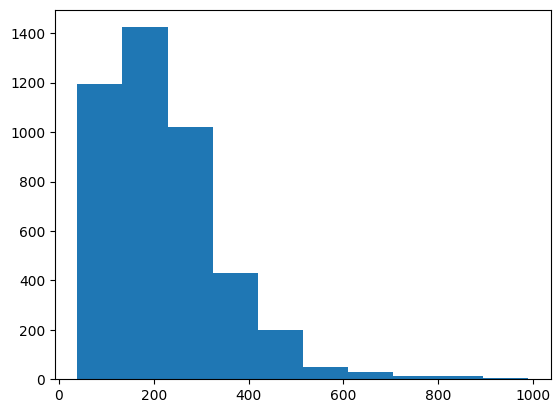

In [10]:
# Relevant text normalization processes -> lowercase, tokenize, rm punc. rm stop_id
regexp = RegexpTokenizer("[\w']+")

def remove_stop(text):
  token = regexp.tokenize(text)
  res = [k for k in token if k.lower() not in stop_id]
  return " ".join(res)

def convert_to_lowercase(text): return text.lower()
def remove_punctuation(text):
  punct_str = string.punctuation
  return text.translate(str.maketrans("", "", punct_str))

def text_preprocess(text):
  text = convert_to_lowercase(text)
  text = remove_punctuation(text)
  return text


dftr1 = dftr.copy()
dfva1 = dfva.copy()
dfte1 = dfte.copy()


for f in [dftr1, dfva1, dfte1]:
  f["Content"] = f["Content"].apply(text_preprocess)
  f["tokens"] = f["Content"].apply(regexp.tokenize)


# ML semua.
uji_token = regexp.tokenize(text_preprocess("ini uji coba bisa gak ya ini isinya hoaks ayo makan barengn klasifikasi"))


plt.hist(dftr1.tokens.apply(lambda x: len(x)))
dftr1.tokens.apply(lambda x: len(x)).describe()


In [11]:
# there are 4.8 words okay.
dftr1["tokens"].explode().value_counts()

tokens
yang                22328
di                  16699
dan                 16600
dengan               8717
itu                  8699
                    ...  
02129222222             1
jayaancol               1
ancoltamanimpian        1
membatah                1
2042022                 1
Name: count, Length: 59159, dtype: int64

## Building Basic Model (tf - idf)
1. I guess they automatically remove the punctuation and do the lowercase.

In [12]:
tfv = TfidfVectorizer(min_df=3,  max_features=None,
                      strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
                      ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
                      stop_words = stop_id)

# Fitting TF-IDF to both training and test sets (semi-supervised learning)
tfv.fit(list(dftr1.Content))

xtr_tf = tfv.transform(dftr1.Content)
xva_tf = tfv.transform(dfva1.Content)
xte_tf = tfv.transform(dfte1.Content)

uji_tf = tfv.transform(["ini uji coba bisa gak ya ini isinya hoaks ayo makan barengn klasifikasi"])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


In [13]:
xtr_tf.shape, xva_tf.shape, xte_tf.shape

((4382, 43933), (548, 43933), (548, 43933))

In [14]:
# Fitting a simple Logistic Regression on TFIDF -> RF can up to 95%
lr1 = LogisticRegression(C=1.0)
lr1.fit(xtr_tf, dftr1.Label)

rf1 = RandomForestClassifier(n_estimators = 100)
rf1.fit(xtr_tf, dftr1.Label)

# uji coba predict.
lr1.predict_proba(uji_tf)

array([[0.110666, 0.889334]])

In [15]:
def print_res(model=lr1, y=dfva1.Label, x=xva_tf):
  prob = model.predict_proba(x)[:,1]
  pred = model.predict(x)

  print("roc score {:0.3f}".format(metrics.roc_auc_score(y, prob)))
  print(metrics.classification_report(y, pred))
  print(metrics.confusion_matrix(y, pred))
  print("\n")

print_res()
print_res(rf1, x=xva_tf)

roc score 0.998
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       205
           1       0.97      0.99      0.98       343

    accuracy                           0.98       548
   macro avg       0.98      0.97      0.97       548
weighted avg       0.98      0.98      0.98       548

[[194  11]
 [  2 341]]


roc score 0.997
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       205
           1       0.97      0.99      0.98       343

    accuracy                           0.98       548
   macro avg       0.98      0.97      0.97       548
weighted avg       0.98      0.98      0.98       548

[[195  10]
 [  3 340]]




### NLP for tfidf things

In [16]:
xtr_tf.toarray().shape, xva_tf.shape

((4382, 43933), (548, 43933))

In [17]:
# Build the model
mod_0 = Sequential([
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Setup the training parameters
mod_0.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
# mod_0.summary()

In [18]:
num_epochs = 8

# Train the model based on tfidf -> not that bad 85, but overfitting
mod_0.fit(xtr_tf.toarray(), dftr1.Label.to_numpy(), epochs=num_epochs,
          validation_data=(xva_tf.toarray(), dfva1.Label.to_numpy()))


Epoch 1/8
137/137 [==============================] - 5s 26ms/step - loss: 0.5438 - accuracy: 0.9183 - val_loss: 0.3660 - val_accuracy: 0.9599
Epoch 2/8
137/137 [==============================] - 2s 15ms/step - loss: 0.2623 - accuracy: 0.9655 - val_loss: 0.1821 - val_accuracy: 0.9836
Epoch 3/8
137/137 [==============================] - 3s 21ms/step - loss: 0.1464 - accuracy: 0.9792 - val_loss: 0.1178 - val_accuracy: 0.9818
Epoch 4/8
137/137 [==============================] - 2s 16ms/step - loss: 0.0999 - accuracy: 0.9833 - val_loss: 0.0890 - val_accuracy: 0.9799
Epoch 5/8
137/137 [==============================] - 2s 13ms/step - loss: 0.0654 - accuracy: 0.9943 - val_loss: 0.0717 - val_accuracy: 0.9836
Epoch 6/8
137/137 [==============================] - 2s 14ms/step - loss: 0.0510 - accuracy: 0.9954 - val_loss: 0.0621 - val_accuracy: 0.9818
Epoch 7/8
137/137 [==============================] - 2s 13ms/step - loss: 0.0419 - accuracy: 0.9963 - val_loss: 0.0553 - val_accuracy: 0.9818
Epoch 

## Word Vectors
Using pre-trained word vectors
1. glove vectors &rarr; can't find any pre-trained one
2. word2vec &rarr; found, idk how to process, lemme find some ref first
3. fasttext &rarr; still trying, so heavy dude, skip
4. google's llm in kaggle &rarr; not yet used.

[From this Link](https://www.kaggle.com/code/sugataghosh/e-commerce-text-classification-tf-idf-word2vec)
> Standard text normalization processes like stemming, lemmatization or removal of stop words are not recommended when we have pre-trained embeddings. The reason behind this is that valuable information, which could be used by the neural network, is lost by those preprocessing steps. Here we shall consider a few selected text normalization processes only, before we feed the tokenized words to the pre-trained model to get the embeddings.

In [19]:
# # i'll skip the 2nd one first
# wvec1 = "https://drive.google.com/uc?id=1lmZuikAJ5t69lZMvx4iKfnsMDS9UI3HB"
# wvec2 = "https://drive.google.com/uc?id=1PfuUEHmN6shLxcgqw0ApM6-LR-hZ4fSy"
# wvec3 = "https://drive.google.com/uc?id=1X5ZPsaoXFxJFrcJ7pVkV9VC81lmDIzdI"

# !gdown "https://drive.google.com/uc?id=1X5ZPsaoXFxJFrcJ7pVkV9VC81lmDIzdI" ## whoah a 1/4 to a gb

### Fitting WVs into a simple classifier
1. eh, idk how to work with word2vec ehhe.

In [20]:
# !unzip "/content/idwiki_word2vec_300.zip" -d "/content/word2vec"

In [21]:
# pwv = '/content/word2vec/idwiki_word2vec_300.model'
# id_w2v = gensim.models.word2vec.Word2Vec.load(pwv)

In [22]:
# dir(id_w2v.wv)
# # id_w2v.wv.most_similar_cosmul()
# id_w2v.wv

In [23]:
# def get_average_word2vec(tokens_list, vector, generate_missing = False, k = 300):
#     if len(tokens_list) < 1:
#         return np.zeros(k)
#     if generate_missing:
#         vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
#     else:
#         vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
#     length = len(vectorized)
#     summed = np.sum(vectorized, axis = 0)
#     averaged = np.divide(summed, length)
#     return averaged

# def get_word2vec_embeddings(vectors, tokens, generate_missing = False):
#     embeddings = tokens.apply(lambda x: get_average_word2vec(x, vectors, generate_missing = generate_missing))
#     return list(embeddings)


In [24]:
# xtr_em = get_word2vec_embeddings(id_w2v.wv, dftr1['tokens'])
# xva_em = get_word2vec_embeddings(id_w2v.wv, dfva1['tokens'])
# xte_em = get_word2vec_embeddings(id_w2v.wv, dfte1['tokens'])

# uji_em = get_word2vec_embeddings(id_w2v.wv, pd.DataFrame(uji_token))

In [25]:
# # Converting to Compressed Sparse Row matrix
# xtr_w2v = scipy.sparse.csr_matrix(xtr_em)
# xva_w2v = scipy.sparse.csr_matrix(xva_em)
# xte_w2v = scipy.sparse.csr_matrix(xte_em)

# # ini tinggal di-predict
# uji_em = scipy.sparse.csr_matrix(xte_em)

## Finally, DNN
**Use coursera as a pointer**
1. architecture to try: sequential of dense, batchnormalization, dense, dropout, batchnormalization, and dense
2. using keras tokenizer to use lstm &rarr; well, must be padded first, you know
  1. getting the embedded word via wordvec.
  2. train
  3. architecture &rarr; embedding of the word index, spatial do, lstm, dense, do, dense, do, and dense
  3. early stopping is not recommended
4. try bi lstm
4. try gru
5. try cnn
6. not yet &rarr; try stemming and lemmatization


idk, maybe useful
- [subword tokenizer](https://www.tensorflow.org/text/guide/tokenizers)
- [and what is this?](https://www.tensorflow.org/text/api_docs/python/text/FastWordpieceTokenizer)


### **Let the weeks' parts keep hidden**


# Hide this.

## Week 1
tokenize, sequences, padding, and simple classification


In [26]:
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# # import tensorflow_text as tf_text

# # Parameters

# vocab_size = 15000
# max_length = 150
# embedding_dim = 16
# oov_tok = "<OOV>"

In [27]:


# # Define input sentences -> using preprocessed or not is really not much different.
# sen_tr = dftr.Content.to_list()
# sen_va = dfva.Content.to_list()
# sen_te = dfte.Content.to_list()

# lab_tr = np.array(dftr.Label)
# lab_va = np.array(dfva.Label)
# lab_te = np.array(dfte.Label)

# # Initialize the Tokenizer class
# tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# # Generate indices for each word in the corpus
# tokenizer.fit_on_texts(sen_tr)

# # Get the indices and print it
# word_index = tokenizer.word_index
# print(word_index)

# # Generate list of token sequences
# seq_tr = tokenizer.texts_to_sequences(sen_tr)
# seq_va = tokenizer.texts_to_sequences(sen_va)
# seq_te = tokenizer.texts_to_sequences(sen_te)


# # Print the result
# print("\nWord Index = " , word_index)
# print("\nSequences = " , seq_tr)

# # Pad the sequences to a uniform length
# pad_tr = pad_sequences(seq_tr, maxlen=max_length, padding='post', truncating='post',)
# pad_va = pad_sequences(seq_va, maxlen=max_length, padding='post', truncating='post',)
# pad_te = pad_sequences(seq_te, maxlen=max_length, padding='post', truncating='post',)


# # Print the result
# print("\nPadded Sequences:")
# print(pad_tr)
# print(pad_va)


In [28]:
# # train and validated
# index = 21
# print(f'sample headline: {sen_tr[index]}')
# print(f'padded sequence: {pad_tr[index]}')
# print(f'shape of padded sequences: {pad_tr.shape}')

# print(f'sample headline: {sen_va[index]}')
# print(f'padded sequence: {pad_va[index]}')

## Week 2
1. simple dnn, without any batching.

In [29]:
# # plot utility
# def plot_graphs(history, string):
#   plt.plot(history.history[string])
#   plt.plot(history.history['val_'+string])
#   plt.xlabel("Epochs")
#   plt.ylabel(string)
#   plt.legend([string, 'val_'+string])
#   plt.show()

In [30]:
# import tensorflow as tf

# # Build the model
# model = Sequential([
#     Embedding(vocab_size, embedding_dim, input_length=max_length),
#     tf.keras.layers.GlobalAveragePooling1D(),
#     Dense(16, activation='relu'),
#     Dropout(0.4),
#     Dense(8, activation='relu'),
#     Dropout(0.4),
#     Dense(1, activation='sigmoid')
# ])

# # Print the model summary
# model.summary()

In [31]:
# num_epochs = 20

# model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# his1 = model.fit(pad_tr, lab_tr, epochs=num_epochs,
#                  validation_data=(pad_va, lab_va))

# plot_graphs(his1, "accuracy")
# plot_graphs(his1, "loss")

# # Epoch 19/20
# # 43/43 [==============================] - 0s 10ms/step - loss: 0.1134 - accuracy: 0.9836 - val_loss: 0.4308 - val_accuracy: 0.8576
# # Epoch 20/20
# # 43/43 [==============================] - 0s 10ms/step - loss: 0.1164 - accuracy: 0.9836 - val_loss: 0.4399 - val_accuracy: 0.8785

## Week 3
Batching. Let's do it.

1. tfds dataset &rarr; shuffle and batching
2. single lstm layer
3. double lstm layer
4. conv1d layer
5.

In [32]:
# BUFFER_SIZE = 100
# BATCH_SIZE = 64

# ten_tr = tf.data.Dataset.from_tensor_slices((pad_tr, lab_tr))
# ten_va = tf.data.Dataset.from_tensor_slices((pad_va, lab_va))
# ten_te = tf.data.Dataset.from_tensor_slices((pad_te, lab_te))

# # Shuffle the training data
# ten_tr = ten_tr.shuffle(BUFFER_SIZE)

# # Batch the training and all data?
# ten_dftr = ten_tr.padded_batch(BATCH_SIZE)
# ten_dfva = ten_va.padded_batch(lab_va.shape[0])
# ten_dfte = ten_te.padded_batch(lab_te.shape[0])


In [33]:
# import tensorflow as tf

# # Hyperparameters
# embedding_dim = 16
# lstm_dim = 16
# dense_dim = 8

# # Build the model
# model2 = tf.keras.Sequential([
#     Embedding(vocab_size, embedding_dim),
#     Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
#     Dropout(0.5),
#     Dense(dense_dim, activation='relu'),
#     Dropout(0.3),
#     Dense(1, activation='sigmoid')
# ])

# model3 = tf.keras.Sequential([
#     Embedding(vocab_size, embedding_dim),
#     Bidirectional(tf.keras.layers.LSTM(lstm_dim, return_sequences=True)),
#     Bidirectional(tf.keras.layers.LSTM(dense_dim)),
#     Dropout(0.5),
#     Dense(dense_dim, activation='relu'),
#     Dropout(0.3),
#     Dense(1, activation='sigmoid')
# ])


# # # Print the model summary
# # model2.summary()
# # model3.summary()



In [34]:
# NUM_EPOCHS = 20

# # Set the training parameters
# model2.compile(loss='binary_crossentropy',
#                optimizer=tf.keras.optimizers.Adam(learning_rate=5e-4),
#                metrics=['accuracy'])

# his2 = model2.fit(ten_dftr, epochs=NUM_EPOCHS, validation_data=ten_dfva)

# # Plot the accuracy and results
# plot_graphs(his2, "accuracy")
# plot_graphs(his2, "loss")

# # Epoch 19/20
# # 22/22 [==============================] - 3s 118ms/step - loss: 0.1226 - accuracy: 0.9725 - val_loss: 0.5301 - val_accuracy: 0.8299
# # Epoch 20/20
# # 22/22 [==============================] - 3s 118ms/step - loss: 0.0930 - accuracy: 0.9836 - val_loss: 0.5277 - val_accuracy: 0.8438

In [35]:
# NUM_EPOCHS = 20

# # Set the training parameters
# model3.compile(loss='binary_crossentropy',
#                optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
#                metrics=['accuracy'])

# his3 = model3.fit(ten_dftr, epochs=NUM_EPOCHS, validation_data=ten_dfva)

# # Plot the accuracy and results
# plot_graphs(his3, "accuracy")
# plot_graphs(his3, "loss")

# # Epoch 19/20
# # 22/22 [==============================] - 4s 189ms/step - loss: 0.1787 - accuracy: 0.9628 - val_loss: 0.4256 - val_accuracy: 0.8507
# # Epoch 20/20
# # 22/22 [==============================] - 5s 247ms/step - loss: 0.1696 - accuracy: 0.9576 - val_loss: 0.4818 - val_accuracy: 0.8160


In [36]:

# # Build the model
# model4 = tf.keras.Sequential([
#     Embedding(vocab_size, embedding_dim),
#     tf.keras.layers.Conv1D(filters=64, kernel_size=10, activation='relu'),
#     Dropout(0.3),
#     GlobalMaxPooling1D(),
#     Dense(16, activation='relu'),
#     Dropout(0.5),
#     Dense(1, activation='linear')
# ])

# model4.summary()

In [37]:
# # 0.29, 0.28 -> 0.85, .875
# NUM_EPOCHS = 20

# # Set the training parameters
# model4.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#                optimizer="adam",
#                metrics=['accuracy'])

# his4 = model4.fit(ten_dftr, epochs=NUM_EPOCHS, validation_data=ten_dfva)

# # Plot the accuracy and results
# plot_graphs(his4, "accuracy")
# plot_graphs(his4, "loss")


# # Epoch 19/20
# # 22/22 [==============================] - 1s 54ms/step - loss: 0.0909 - accuracy: 0.9368 - val_loss: 0.3159 - val_accuracy: 0.8750
# # Epoch 20/20
# # 22/22 [==============================] - 1s 41ms/step - loss: 0.0962 - accuracy: 0.9450 - val_loss: 0.3268 - val_accuracy: 0.8785

# Show this.
Oke? so, here we go -- remove \n \xa0 and else -> remove non alpha character -> remove what? idk dude. okay -> hari, bulan, maybe they

## Week 3 L4
Use this instead!  
The accuracy is oscillating between 80-90.


In [137]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

In [139]:
vocab_size = 3000
max_length = 120
oov_tok = "<OOV>"

# Define input sentences -> using preprocessed or not is really not much different.
sen_tr = dftr.Content.str.translate(str.maketrans("", "", '0123456789\n')).to_list()
sen_va = dfva.Content.str.translate(str.maketrans("", "", '0123456789\n')).to_list()
sen_te = dfte.Content.str.translate(str.maketrans("", "", '0123456789\n')).to_list()

lab_tr = np.array(dftr.Label)
lab_va = np.array(dfva.Label)
lab_te = np.array(dfte.Label)

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# Generate indices for each word in the corpus
tokenizer.fit_on_texts(sen_tr)

# Get the indices and print it
word_index = tokenizer.word_index
print(word_index)

# Generate list of token sequences
seq_tr = tokenizer.texts_to_sequences(sen_tr)
seq_va = tokenizer.texts_to_sequences(sen_va)
seq_te = tokenizer.texts_to_sequences(sen_te)


# Print the result
print("\nWord Index = " , word_index)
print("\nSequences = " , seq_tr)

# Pad the sequences to a uniform length
pad_tr = pad_sequences(seq_tr, maxlen=max_length, padding='post', truncating='post',)
pad_va = pad_sequences(seq_va, maxlen=max_length, padding='post', truncating='post',)
pad_te = pad_sequences(seq_te, maxlen=max_length, padding='post', truncating='post',)


# Print the result
print("\nPadded Sequences:")
print(pad_tr)
print(pad_va)


{'<OOV>': 1, 'yang': 2, 'di': 3, 'dan': 4, 'itu': 5, 'dengan': 6, 'dari': 7, 'tersebut': 8, 'ini': 9, 'dalam': 10, 'tidak': 11, 'untuk': 12, 'pada': 13, 'juga': 14, 'ada': 15, 'akan': 16, 'ke': 17, 'partai': 18, 'bahwa': 19, 'oleh': 20, 'indonesia': 21, 'presiden': 22, 'sebagai': 23, 'politik': 24, 'atau': 25, 'jokowi': 26, 'video': 27, 'kata': 28, 'sudah': 29, 'saat': 30, 'karena': 31, 'saya': 32, 'adalah': 33, 'akun': 34, 'telah': 35, 'bisa': 36, 'dia': 37, 'kepada': 38, 'kita': 39, 'foto': 40, 'tahun': 41, 'orang': 42, 'ketua': 43, 'menjadi': 44, 'jakarta': 45, 'penjelasan': 46, 'informasi': 47, 'merupakan': 48, 'hasil': 49, 'negara': 50, 'salah': 51, 'ia': 52, 'kami': 53, 'mengatakan': 54, 'hal': 55, 'mereka': 56, 'hari': 57, 'pemilu': 58, 'setelah': 59, 'berdasarkan': 60, 'com': 61, 'yg': 62, 'masyarakat': 63, 'lebih': 64, 'dapat': 65, 'melalui': 66, 'jadi': 67, 'umum': 68, 'hanya': 69, 'tak': 70, 'pemerintah': 71, 'satu': 72, 'seperti': 73, 'baru': 74, 'covid': 75, 'beredar': 76,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Padded Sequences:
[[ 501 1464 1402 ... 2012  313    1]
 [1024  588  459 ...    1 1588  351]
 [  86  262   62 ...    3 2425   13]
 ...
 [   1 1878 1739 ...    1    6 1907]
 [ 455  334   18 ... 2845  402  114]
 [ 142 1374   46 ...  125  599    1]]
[[ 102 2574    3 ...    0    0    0]
 [ 948 2228  558 ...    0    0    0]
 [  86   10   27 ... 1517   34 1756]
 ...
 [  43   68   18 ...  191   33    1]
 [ 760  809 1859 ...   36   67   56]
 [  69    3 2291 ...    1    1    7]]


In [140]:
# plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# dimension
NUM_EPOCHS = 10
BATCH_SIZE = 32


In [141]:
# Parameters
embedding_dim = 16
dense_dim = 8

# Model Definition with a Flatten layer
model_flatten = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(dense_dim, activation='relu',
    #                       kernel_regularizer=tf.keras.regularizers.l2(0.1)
    #                       ),
    # tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_flatten.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_flatten.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 120, 16)           48000     
                                                                 
 dropout_6 (Dropout)         (None, 120, 16)           0         
                                                                 
 flatten_3 (Flatten)         (None, 1920)              0         
                                                                 
 dense_7 (Dense)             (None, 1)                 1921      
                                                                 
Total params: 49921 (195.00 KB)
Trainable params: 49921 (195.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
137/137 [==============================] - 1s 5ms/step - loss: 0.5426 - accuracy: 0.7227 - val_loss: 0.3535 - val_accuracy: 0.9161
Epoch 2/10
137/137 [==============================] - 1s 4ms/step - loss: 0.2189 - accuracy: 0.9493 - val_loss: 0.1380 - val_accuracy: 0.9617
Epoch 3/10
137/137 [==============================] - 1s 4ms/step - loss: 0.1065 - accuracy: 0.9722 - val_loss: 0.0939 - val_accuracy: 0.9672
Epoch 4/10
137/137 [==============================] - 1s 4ms/step - loss: 0.0672 - accuracy: 0.9822 - val_loss: 0.0767 - val_accuracy: 0.9781
Epoch 5/10
137/137 [==============================] - 1s 4ms/step - loss: 0.0495 - accuracy: 0.9872 - val_loss: 0.0693 - val_accuracy: 0.9799
Epoch 6/10
137/137 [==============================] - 1s 4ms/step - loss: 0.0370 - accuracy: 0.9906 - val_loss: 0.0643 - val_accuracy: 0.9818
Epoch 7/10
137/137 [==============================] - 1s 4ms/step - loss: 0.0272 - accuracy: 0.9941 - val_loss: 0.0593 - val_accuracy: 0.9799
Epoch 

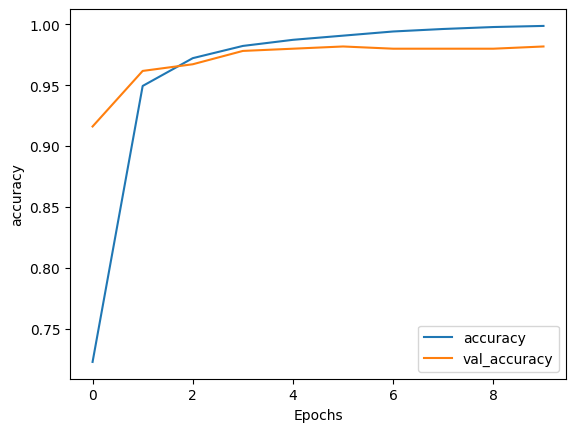

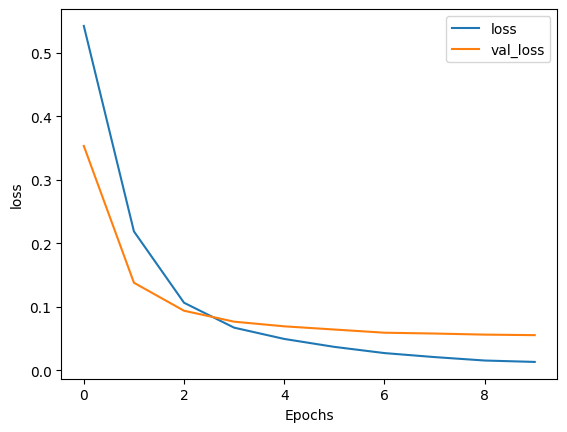

In [142]:
# Train the model
history_flatten = model_flatten.fit(pad_tr, lab_tr, epochs=NUM_EPOCHS, validation_data=(pad_va, lab_va))

# Plot the accuracy and loss history
plot_graphs(history_flatten, 'accuracy')
plot_graphs(history_flatten, 'loss')

In [143]:
metrics.accuracy_score(lab_te, model_flatten.predict(pad_te)>0.5)


18/18 [==============================] - 0s 2ms/step


0.9854014598540146

18/18 [==============================] - 0s 2ms/step
[0.94525547]


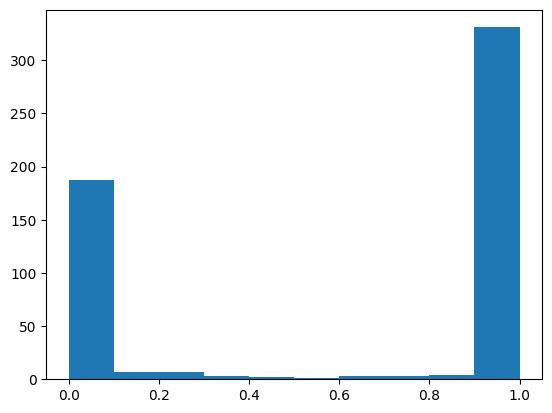

In [144]:
probs = model_flatten.predict(pad_te)
plt.hist(probs)

# too good to be true. 7% is swayed one.
print(sum((probs>0.9)|(probs<0.1))/len(pad_te))

## More Complex.

In [45]:
# # Parameters
# embedding_dim = 16
# lstm_dim = 32
# dense_dim = 8

# # Model Definition with LSTM
# model_lstm = tf.keras.Sequential([
#     tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
#     # tf.keras.layers.Dropout(0.7),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
#     tf.keras.layers.Dense(dense_dim, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# # Set the training parameters
# model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# # Print the model summary
# model_lstm.summary()

In [46]:
# history_lstm = model_lstm.fit(pad_tr, lab_tr, batch_size=BATCH_SIZE,
#                                     epochs=NUM_EPOCHS, validation_data=(pad_va, lab_va))

# # Plot the accuracy and loss history
# plot_graphs(history_lstm, 'accuracy')
# plot_graphs(history_lstm, 'loss')

In [47]:
# # Parameters
# embedding_dim = 16
# lstm_dim = 32
# dense_dim = 6

# # Model Definition with LSTM
# model_lstm2 = tf.keras.Sequential([
#     tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim, return_sequences=True)),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
#     tf.keras.layers.Dense(dense_dim, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# # Set the training parameters
# model_lstm2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# # Print the model summary
# model_lstm2.summary()

In [48]:
# history_lstm2 = model_lstm2.fit(pad_tr, lab_tr, batch_size=BATCH_SIZE,
#                                 epochs=NUM_EPOCHS, validation_data=(pad_va, lab_va))

# # Plot the accuracy and loss history
# plot_graphs(history_lstm2, 'accuracy')
# plot_graphs(history_lstm2, 'loss')

In [49]:
# import tensorflow as tf

# # Parameters
# embedding_dim = 16
# gru_dim = 32
# dense_dim = 6

# # Model Definition with GRU
# model_gru = tf.keras.Sequential([
#     tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
#     tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
#     tf.keras.layers.Dense(dense_dim, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# # Set the training parameters
# model_gru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# # Print the model summary
# model_gru.summary()

In [50]:
# history_gru = model_gru.fit(pad_tr, lab_tr, batch_size=BATCH_SIZE,
#                             epochs=NUM_EPOCHS, validation_data=(pad_va, lab_va))

# plot_graphs(history_gru, 'accuracy')
# plot_graphs(history_gru, 'loss')

In [51]:
# # Parameters
# embedding_dim = 16
# filters = 128
# kernel_size = 5
# dense_dim = 6

# # Model Definition with Conv1D
# model_conv = tf.keras.Sequential([
#     tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
#     tf.keras.layers.Conv1D(filters, kernel_size, activation='relu'),
#     tf.keras.layers.GlobalAveragePooling1D(),
#     tf.keras.layers.Dense(dense_dim, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# # Set the training parameters
# model_conv.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# # Print the model summary
# model_conv.summary()

In [52]:
# # Train the model
# history_conv = model_conv.fit(pad_tr, lab_tr, batch_size=BATCH_SIZE,
#                               epochs=NUM_EPOCHS, validation_data=(pad_va, lab_va))


# # Plot the accuracy and loss history
# plot_graphs(history_conv, 'accuracy')
# plot_graphs(history_conv, 'loss')

## Google Embedding.
IDK just useless?

In [53]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
import os
tfds.disable_progress_bar()

print("\u2022 Using TensorFlow Version:", tf.__version__)

# pad_tr, lab_tr, pad_va, lab_va, pad_te, lab_te

• Using TensorFlow Version: 2.15.0


In [54]:
## transform into tfds dataset
BUFFER_SIZE = 1024
BATCH_SIZE = 128

ten_tr = tf.data.Dataset.from_tensor_slices((dftr.Content.apply(remove_stop), dftr.Label))
ten_va = tf.data.Dataset.from_tensor_slices((dfva.Content.apply(remove_stop), dfva.Label))
ten_te = tf.data.Dataset.from_tensor_slices((dfte.Content.apply(remove_stop), dfte.Label))

# Shuffle the training data
ten_tr = ten_tr.shuffle(BUFFER_SIZE)

# Batch the training and all data?
ten_dftr = ten_tr.padded_batch(BATCH_SIZE)
ten_dfva = ten_va.padded_batch(lab_va.shape[0])
ten_dfte = ten_te.padded_batch(lab_te.shape[0])


In [55]:
# if you are running the notebook on Colab
embedding = "https://www.kaggle.com/models/google/nnlm/TensorFlow2/id-dim50/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], dtype=tf.string, trainable=False)

In [56]:
filters = 64
kernel_size = 5
dense_dim = 6

mod_em = tf.keras.Sequential([
    hub_layer,
    tf.keras.layers.Reshape([5, 10]),
    tf.keras.layers.Conv1D(filters, kernel_size, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='linear')
    ])

mod_em.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                43930400  
                                                                 
 reshape (Reshape)           (None, 5, 10)             0         
                                                                 
 conv1d (Conv1D)             (None, 1, 64)             3264      
                                                                 
 dropout_2 (Dropout)         (None, 1, 64)             0         
                                                                 
 global_average_pooling1d (  (None, 64)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense_3 (Dense)             (None, 6)                 390       
                                                      

In [57]:
# mod_em.compile(optimizer='adam',
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# his_em = mod_em.fit(ten_dftr, validation_data=ten_dfva,
#                     epochs=NUM_EPOCHS*10)

# # Plot the accuracy and loss history
# plot_graphs(his_em, 'accuracy')
# plot_graphs(his_em, 'loss')

In [58]:
# mod_em.save("mod_em.h5")
# import os
# os.path.getsize("/content/mod_em.h5")/1024/1024

## Want to explore BERT?
- Is it
[worth to try?](https://www.kaggle.com/code/tanulsingh077/deep-learning-for-nlp-zero-to-transformers-bert)
- How about [id?](https://www.kaggle.com/code/rizkia14/analisis-sentimen-unsupervised-lexical)
-

In [59]:

# # model = AutoModel.from_pretrained(

# from transformers import BertTokenizer
# from transformers import TFBertForSequenceClassification

# btoken = BertTokenizer.from_pretrained("indobenchmark/indobert-lite-base-p2")

In [60]:
# vocab = btoken.get_vocab()

In [61]:
# len(vocab)
# dftr["Content"].apply(btoken.tokenize)


In [62]:


# # Generate list of token sequences
# seq_trb = tokenizer.texts_to_sequences(sen_tr)
# seq_vab = tokenizer.texts_to_sequences(sen_va)
# seq_teb = tokenizer.texts_to_sequences(sen_te)


# # Print the result
# print("\nWord Index = " , word_index)
# print("\nSequences = " , seq_tr)

# # Pad the sequences to a uniform length
# pad_tr = pad_sequences(seq_tr, maxlen=max_length, padding='post', truncating='post',)
# pad_va = pad_sequences(seq_va, maxlen=max_length, padding='post', truncating='post',)
# pad_te = pad_sequences(seq_te, maxlen=max_length, padding='post', truncating='post',)


In [63]:
# # Load tokenizer dari pre-trained model
# bert_tokenizer = BertTokenizer.from_pretrained("indobenchmark/indobert-base-p2")

# # View vocabulary from pre-trained models that have been preloaded
# vocabulary = bert_tokenizer.get_vocab()
# print('Panjang vocabulary:', len(vocabulary))

# # Example of Tokenization
# # Retrieve the 1st index data on the dataframe
# print('Kalimat:', dftr['Content'][704])
# print('BERT Tokenizer:', bert_tokenizer.tokenize(dftr['Content'][704]))


In [64]:
# # Example of input formatting for BERT.
# # Input formatting can use 'encode_plus' function
# bert_input = bert_tokenizer.encode_plus(
#     # Sample sentences
#     "Mau bagaimana lagi, mengsedih nih",
#     # Add [CLS] token at the beginning of the sentence & [SEP] token at the end of the sentence
#     add_special_tokens = True,
#     # Add padding to max_length using [PAD] token
#     # jika kalimat kurang dari max_length
#     padding = 'max_length',
#     # Truncate if sentence is more than max_length
#     truncation = 'longest_first',
#     # Determine the max_length of the entire sentence
#     max_length = 50,
#     # Returns the attention mask value
#     return_attention_mask = True,
#     # Returns the value of token type id (segment embedding)
#     return_token_type_ids =True)
# # The function 'encode_plus' returns 3 values:
# # input_ids, token_type_ids, attention_mask

# bert_input.keys()

In [65]:
# # Original data
# print('Kalimat\t\t:', "Mau bagaimana lagi, mengsedih nih")

# # Input formatting + tokenizer return
# # print('Tokenizer\t:', bert_tokenizer.convert_ids_to_tokens(bert_input['input_ids']))
# # Input IDs: token indexes in the tokenizer vocabulary
# print('Input IDs\t:', bert_input['input_ids'])
# # Token type IDs: shows the sequence of sentences in the sequence (segment embedding)
# print('Token Type IDs\t:', bert_input['token_type_ids'])
# # Attention mask : returns value [0,1].
# #1 means masked token, 0 tokens are not masked (ignored)
# print('Attention Mask\t:', bert_input['attention_mask'])


In [66]:
# import seaborn as sns
# # There are many ways to define max_length
# # The intuition is that we don't want to cut sentences
# # Or added too much padding (longer computation)

# # In this example, max_length is determined from the distribution of tokens in the dataset
# token_lens = []
# for txt in dftr['Content']:
#   tokens = bert_tokenizer.encode(txt)
#   token_lens.append(len(tokens))


In [67]:
# sns.histplot(token_lens, kde=True, stat='density', linewidth=0)
# plt.xlim([0,500]);
# plt.xlabel('Token count');

In [68]:
# # Create a function to combine tokenization steps
# # Added special tokens for all data as input formatting to the BERT model
# def convert_example_to_feature(sentence):
#   return bert_tokenizer.encode_plus(
#       sentence,
#       add_special_tokens=True,
#       padding='max_length',
#       truncation='longest_first',
#       max_length=250,
#       return_attention_mask=True,
#       return_token_type_ids=True)

In [69]:
# # Create a function to map input formatting results to match the BERT model
# def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
#   return {
#       "input_ids": input_ids,               # Sebagai token embedding
#       "token_type_ids": token_type_ids,     # Sebagai segment embedding
#       "attention_mask": attention_masks,    # Sebagai filter informasi mana yang kalkulasi oleh model
#   }, label


In [70]:
# # Create a function to iterate or encode each sentence in the entire data
# def encode(data):
#   input_ids_list = []
#   token_type_ids_list = []
#   attention_mask_list = []
#   label_list = []

#   for sentence, label in data.to_numpy():
#     bert_input = convert_example_to_feature(sentence)
#     input_ids_list.append(bert_input['input_ids'])
#     token_type_ids_list.append(bert_input['token_type_ids'])
#     attention_mask_list.append(bert_input['attention_mask'])
#     label_list.append([label])

#   return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_example_to_dict)

In [71]:
# # Perform input formatting using the previous function on the data as a whole
# train_encoded = encode(dftr).shuffle(dftr.shape[0]).batch(32)
# test_encoded = encode(dfva).batch(32)
# val_encoded = encode(dfte).batch(32)


In [72]:
# # Load model
# bert_model = TFBertForSequenceClassification.from_pretrained(
#     'indobenchmark/indobert-base-p2', num_labels=2)


# # bert_model = tf.keras.Sequential([
# #     bert_model,
# #     # tf.keras.layers.Reshape([5, 10]),
# #     # tf.keras.layers.Conv1D(filters, kernel_size, activation='relu'),
# #     # tf.keras.layers.Dropout(0.5),
# #     # tf.keras.layers.GlobalAveragePooling1D(),
# #     # tf.keras.layers.Dense(dense_dim, activation='relu'),
# #     tf.keras.layers.Dense(1, activation='linear')])


In [73]:
# # Compile model
# bert_model.compile(
#     optimizer="adam",
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#     metrics=tf.keras.metrics.SparseCategoricalAccuracy('accuracy'))


In [74]:
# %%time
# his_bert = bert_model.fit(train_encoded, epochs=20,
#                           batch_size=32, validation_data=val_encoded)

In [75]:
# plot_graphs(his_bert, 'accuracy')
# plot_graphs(his_bert, 'loss')

In [76]:
# bert_model.save('model',save_format='tf')

In [77]:
# os.path.getsize("/content/model/variables/saved_model.pb")/1024/1024

## Explore BERT #2
[From this link](https://www.kaggle.com/code/magf46/step-1-retrain-n-fine-tune-indobert-base-p2)

Forget it, using pytorch hell no.

## Deployment.
1. Preprocess Pipeline
  1. Clean
  2. Tokenize
  3. Optional: into tf-idf
2. Modeling
  1. Uh

### Save preprocess things.

In [145]:
import pickle

In [146]:
# save tokenizer
with open('tokenizer.pkl', 'wb') as f:
  pickle.dump(tokenizer, f)

# save model
model_flatten.save('flatten.h5')

# convert to tflite
con_flatten = tf.lite.TFLiteConverter.from_keras_model(model_flatten)
flatten_lite = con_flatten.convert()

with open('flatten.tflite', 'wb') as f:
  f.write(flatten_lite)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [147]:
import os
dir0 = '/content'

for i, k in enumerate(os.listdir()):
  path = os.path.join(dir0, k)
  print(k, round(os.path.getsize(path)/1024/1024, 3), "MB")

.config 0.004 MB
flatten.h5 0.598 MB
flatten.tflite 0.192 MB
tokenizer.pkl 1.923 MB
sample_data 0.004 MB


### Load tokenizer, model

In [148]:
# load tokenizer
with open('/content/tokenizer.pkl', 'rb') as f:
  penoken = pickle.load(f)


# load model
int_flatten = tf.lite.Interpreter(model_path="/content/flatten.tflite")
int_flatten.allocate_tensors()

input_details = int_flatten.get_input_details()
output_details = int_flatten.get_output_details()

input_details, output_details


([{'name': 'serving_default_embedding_3_input:0',
   'index': 0,
   'shape': array([  1, 120], dtype=int32),
   'shape_signature': array([ -1, 120], dtype=int32),
   'dtype': numpy.float32,
   'quantization': (0.0, 0),
   'quantization_parameters': {'scales': array([], dtype=float32),
    'zero_points': array([], dtype=int32),
    'quantized_dimension': 0},
   'sparsity_parameters': {}}],
 [{'name': 'StatefulPartitionedCall:0',
   'index': 9,
   'shape': array([1, 1], dtype=int32),
   'shape_signature': array([-1,  1], dtype=int32),
   'dtype': numpy.float32,
   'quantization': (0.0, 0),
   'quantization_parameters': {'scales': array([], dtype=float32),
    'zero_points': array([], dtype=int32),
    'quantized_dimension': 0},
   'sparsity_parameters': {}}])

In [151]:
ins = ['Informasi buat rekan2: Bagi yang punya anak TK, SD dan SMP mohon dengan hormat disampaikan kpd putra dan putrinya : bahwa tadi pagi ada kejadian di SDN 2 Kemantren selesai membeli sari buah pisang cair dg harga Rp. 2.000,-. Diduga ada kandungan narkoba. A. adapun sistem cara memakainya sbb: Cairan tsb di semprotkan pada mulut. B. Hasil / reaksi minuman tsb sbb: Segar dan nikmat selanjutnya pemakai tsb menjadi lemas dan bola mata keatas. Sekarang kasus tsb sedang dalam penyelidikan Polisi Gedeg. Penjualnya sudah pindah tempeh dan masih jadi pencarian pihak Polsek. Wis sementara sakmane sik, WASPADA!” ']
ins = ['Mantan Wakil Ketua Komisi Pemberantasan Korupsi (KPK) Saut Situmorang mengkritik pernyataan Presiden Joko Widodo bahwa persoalan yang belakangan kerap menimpa KPK bukan urusannya.Jokowi diketahui sempat menyatakan jangan apa-apa ditarik ke presiden soal urusan Tes Wawasan Kebangsaan (TWK) KPK belakangan ini.']


In [152]:

seq = penoken.texts_to_sequences(ins)
pad = pad_sequences(seq, maxlen=120, padding="post", truncating='post')
pad = tf.cast(pad, tf.float32)

in_index = int_flatten.get_input_details()[0]["index"]
int_flatten.set_tensor(in_index, pad)

int_flatten.invoke()

out_index = int_flatten.get_output_details()[0]["index"]
out = int_flatten.tensor(out_index)

# so, it is not that good lol. 0 good 1 is hoax.
print(out()[0])


[0.9980965]
